# Введение 
▎О наборе данных

Обзор:
Этот набор данных включает информацию для оценки уровней ожирения у людей из стран Мексики, Перу и Колумбии, основанную на их пищевых привычках и физическом состоянии. Данные содержат 17 атрибутов и 2111 записей, которые помечены классом NObesity (Уровень ожирения), что позволяет классифицировать данные по значениям: Нехватка веса, Нормальный вес, Избыточный вес I уровня, Избыточный вес II уровня, Ожирение I типа, Ожирение II типа и Ожирение III типа.

Детали данных:

• Пол: Пол

• Возраст: Возраст

• Рост: в метрах

• Вес: в килограммах

• Семейная история: Есть ли у кого-то из членов семьи проблемы с избыточным весом?

• FAVC: Часто ли вы едите высококалорийную пищу?

• FCVC: Обычно ли вы едите овощи в своих приемах пищи?

• NCP: Сколько основных приемов пищи у вас в день?

• CAEC: Едите ли вы что-либо между приемами пищи?

• Курение: Курите ли вы?

• CH2O: Сколько воды вы пьете ежедневно?

• SCC: Следите ли вы за калориями, которые едите ежедневно?

• FAF: Как часто вы занимаетесь физической активностью?

• TUE: Сколько времени вы проводите с технологическими устройствами, такими как мобильный телефон, видеоигры, телевизор, компьютер и другие?

• CALC: Как часто вы употребляете алкоголь?

• MTRANS: Какой транспорт вы обычно используете?

• Уровень ожирения (Целевая колонка): Уровень ожирения

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Обработка данных

In [2]:
df = pd.read_csv('Obesity prediction.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


посмотрим на типы данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

## Посмотрим на отклонения

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


данные возраста имеют некие выбросы согластно max = (3* std) + mean  , но 61 год имеет место в человечесуой жизне, так что не считаем за силньый выброс,
добавим параметер ИМТ 



In [5]:
df['IMT'] = df['Weight'] / df['Height'] ** 2
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMT
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


## Проведем проверку на пропуски

In [6]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
IMT               0
dtype: int64

как мы видем пропуски отсуствуют

разделим данные на числовые и категориальные

In [7]:
num = df.select_dtypes(exclude='object').columns.to_list()
cat = df.select_dtypes(include='object').columns.to_list()
cat.remove('Obesity')

## Корреляция

<Axes: >

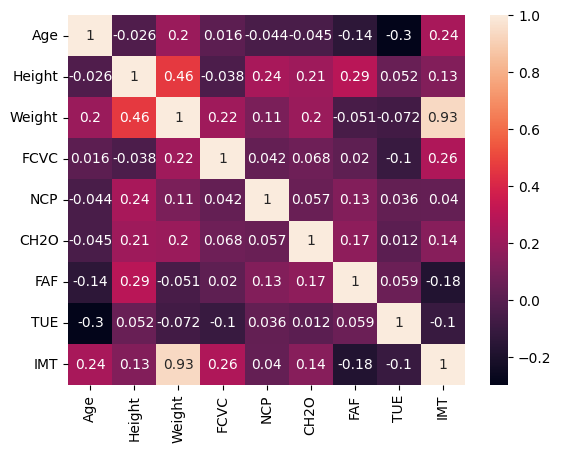

In [8]:
sns.heatmap(df[num].corr(),
            annot=True,
            fmt= '.2g'

)

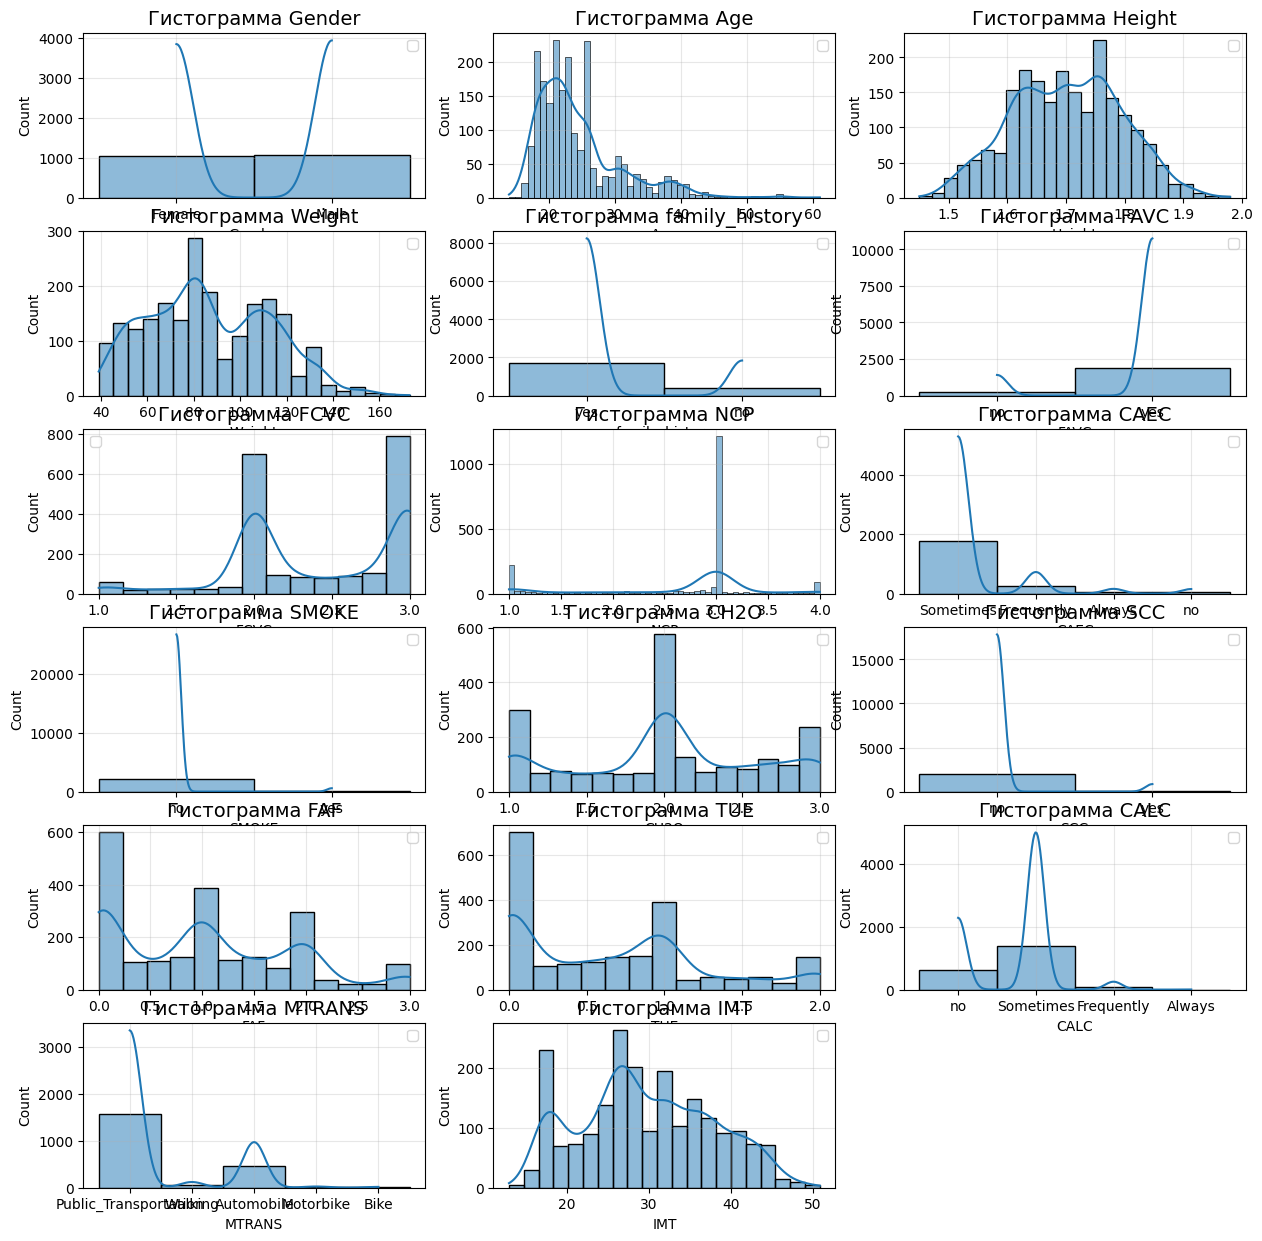

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))
for i, col in enumerate(df.drop('Obesity', axis = 1).columns):
    
    plt.subplot(6,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Гистограмма {col}', fontsize=14)
    plt.legend()
    plt.xlabel(col)
    plt.grid(alpha = 0.3)

Обьеденим типы ожирения н а меньшие группы

In [10]:
df['Obesity'] = df['Obesity'].replace({
    'Normal_Weight': 'Normal_Weight',
    'Insufficient_Weight': 'Insufficient_Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity'
})
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight', 'Obesity', 'Insufficient_Weight'],
      dtype=object)

# Разделение на Х и у

Кодирование категориальных признаков


In [11]:
X = df.drop(columns=['Obesity'])
y = df['Obesity']


In [12]:
y = pd.get_dummies(df, columns=['Obesity'], drop_first=True)


In [13]:
def encode_multiclass_target(df, category, target='Obesity'):
    df = df[[category, target]].copy()
    target_dummies = pd.get_dummies(df[target],prefix=category,drop_first=True)
    df = pd.concat((df, target_dummies), axis=1)
    for tg in target_dummies.columns:
        df[tg] = df.groupby(category)[tg].transform("mean")
    return df.drop(category, axis=1)



In [14]:
for col in df[cat]:
    if df[col].nunique() < 3:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype='int')
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
    else:
        mean_target = encode_multiclass_target(df, col).drop("Obesity", axis=1)
        df = pd.concat((df.drop(col, axis=1), mean_target), axis=1)

In [15]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,IMT,...,CAEC_Obesity,CAEC_Overweight,SMOKE_yes,SCC_yes,CALC_Normal_Weight,CALC_Obesity,CALC_Overweight,MTRANS_Normal_Weight,MTRANS_Obesity,MTRANS_Overweight
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,24.386526,...,0.54051,0.286686,0,0,0.167449,0.370892,0.278560,0.126582,0.480380,0.253797
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,24.238227,...,0.54051,0.286686,1,1,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,23.765432,...,0.54051,0.286686,0,0,0.257143,0.228571,0.500000,0.126582,0.480380,0.253797
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight,26.851852,...,0.54051,0.286686,0,0,0.257143,0.228571,0.500000,0.571429,0.053571,0.267857
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight,28.342381,...,0.54051,0.286686,0,0,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity,44.901475,...,0.54051,0.286686,0,0,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity,43.741923,...,0.54051,0.286686,0,0,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity,43.543817,...,0.54051,0.286686,0,0,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity,44.071535,...,0.54051,0.286686,0,0,0.114918,0.513205,0.261956,0.126582,0.480380,0.253797


In [16]:
X = df.drop(columns=['Obesity'])
y = df['Obesity']


#### PCA преобразование

In [17]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
X_pca

array([[-23.31196848,  -2.01397589],
       [-31.02454783,  -1.49567813],
       [-10.91296609,  -1.03833471],
       ...,
       [ 48.94128263,  -4.25740297],
       [ 48.85639406,  -2.37057801],
       [ 48.96213125,  -3.06968976]], shape=(2111, 2))

In [18]:
X_tsne = np.concatenate((X_pca, y.values.reshape(-1, 1)),
                               axis=1)
X_tsne = pd.DataFrame(X_tsne, columns=['PCA_1st_component',
                                       'PCA_2nd_component',
                                       'Obesity Types'])
X_tsne

,PCA_1st_component,PCA_2nd_component,Obesity Types
0,-23.311968,-2.013976,Normal_Weight
1,-31.024548,-1.495678,Normal_Weight
2,-10.912966,-1.038335,Normal_Weight
3,-0.261622,2.445367,Overweight
4,2.578647,-2.568379,Overweight
...,...,...,...
2106,47.04903,-5.553365,Obesity
2107,49.020209,-4.783092,Obesity
2108,48.941283,-4.257403,Obesity
2109,48.856394,-2.370578,Obesity


<Axes: xlabel='PCA_1st_component', ylabel='PCA_2nd_component'>

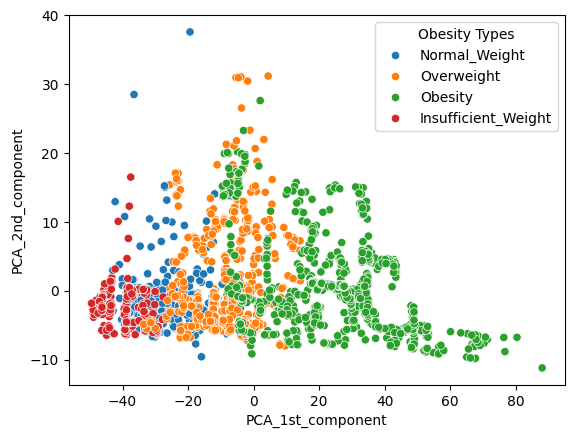

In [19]:
sns.scatterplot(x=X_tsne['PCA_1st_component'], y=X_tsne['PCA_2nd_component'], hue=X_tsne['Obesity Types'])

#### Сегментация KMeans с 8-ю кластерами

In [20]:
from sklearn.cluster import KMeans
kmeans_semg = KMeans(init='random', n_clusters=len(y.unique())).fit(X)
k_means_labels = kmeans_semg.predict(X)

X_pca_with_kmeans_preds = pd.concat(
    (
        X_tsne, pd.DataFrame({"KMEANS label":k_means_labels})
    ),
    axis=1
)

X_pca_with_kmeans_preds.head()

,PCA_1st_component,PCA_2nd_component,Obesity Types,KMEANS label
0,-23.311968,-2.013976,Normal_Weight,2
1,-31.024548,-1.495678,Normal_Weight,2
2,-10.912966,-1.038335,Normal_Weight,3
3,-0.261622,2.445367,Overweight,3
4,2.578647,-2.568379,Overweight,3


Сравним долю совпадения ответов K-Means кластеризации с истинными сегментами

In [21]:
import itertools

accuracies = {}

for perm in itertools.permutations(X_tsne['Obesity Types'].unique()):

    vv = dict(zip(perm, [0, 1, 2, 3]))

    mapping = X_pca_with_kmeans_preds['Obesity Types'].map(vv)
    acc = (mapping == X_pca_with_kmeans_preds['KMEANS label']).mean()

    accuracies[perm] = acc

print(f"{max(accuracies.values())} for {max(accuracies, key=accuracies.get)} combination")

0.6385599242065372 for ('Normal_Weight', 'Obesity', 'Insufficient_Weight', 'Overweight') combination


In [22]:
real_cluster_names = dict(zip([0, 1, 2, 3], max(accuracies, key=accuracies.get)))
real_cluster_names

{0: 'Normal_Weight', 1: 'Obesity', 2: 'Insufficient_Weight', 3: 'Overweight'}

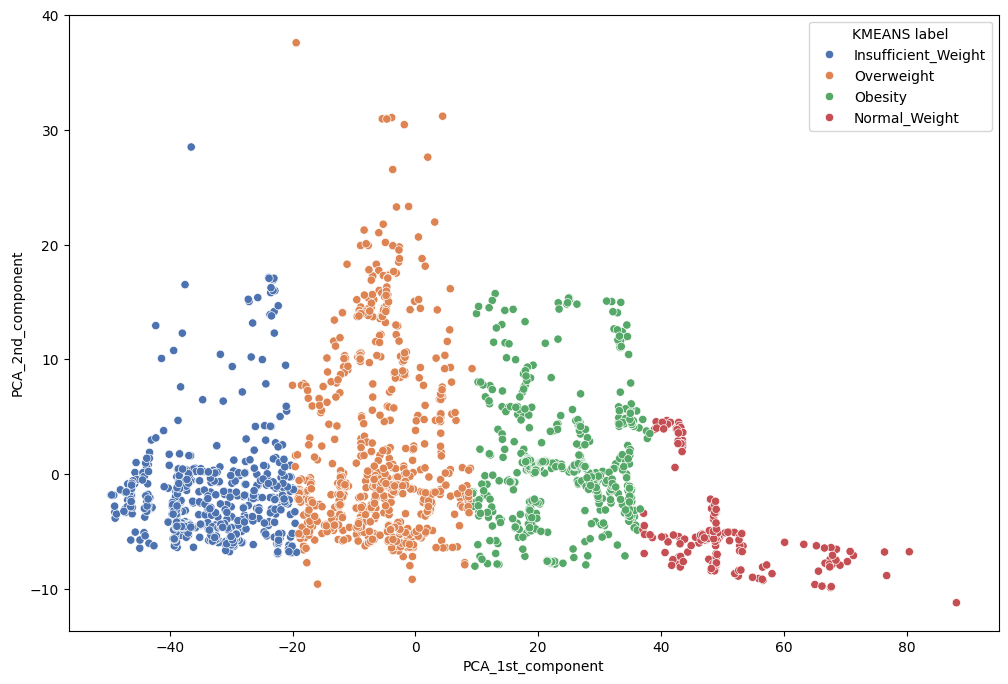

In [23]:
fig = plt.figure()
fig.set_size_inches(12, 8)

X_inv = X_pca_with_kmeans_preds.copy()
X_inv["KMEANS label"] = X_inv["KMEANS label"].map(real_cluster_names)

sns.scatterplot(data=X_inv,
                x="PCA_1st_component",
                y="PCA_2nd_component",
                hue="KMEANS label",
                palette="deep")

plt.show()

In [24]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans_semg.fit_predict(X))
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.4844121972740239


In [25]:
from sklearn.metrics import pairwise_distances
y_kmeans = kmeans_semg.fit_predict(X)

# Вычисление R-mean
clusters = [X[y_kmeans == i] for i in range(kmeans_semg.n_clusters)]
distances_within = []
distances_between = []

for cluster in clusters:
    distances_within.append(np.mean(pairwise_distances(cluster, cluster)))

# Расчет средних расстояний между кластерами
for i in range(len(clusters)):
    for j in range(i + 1, len(clusters)):
        distances_between.append(np.mean(pairwise_distances(clusters[i], clusters[j])))

mean_within = np.mean(distances_within)
mean_between = np.mean(distances_between)

# Рассчитываем R-mean
R_mean = mean_within / mean_between
print(f"R-mean: {R_mean}")

R-mean: 0.25886026342729107


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
class EncodeCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, target='Obesity'):
        self.target = target
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        
        def encode_multiclass_target(df, category):
            df_copy = df[[category, self.target]].copy()
            target_dummies = pd.get_dummies(df_copy[self.target], prefix=self.target, drop_first=True)
            df_copy = pd.concat((df_copy, target_dummies), axis=1)

            for tg in target_dummies.columns:
                df_copy[tg] = df_copy.groupby(category)[tg].transform("mean")
            
            return df_copy.drop(category, axis=1)
        
        # Применение кодировки
        for col in df.select_dtypes(include=['object', 'category']):
            if df[col].nunique() < 3:
                one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype='int')
                df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
            else:
                mean_target = encode_multiclass_target(df, col).drop(self.target, axis=1)
                df = pd.concat((df.drop(col, axis=1), mean_target), axis=1)
            
        return df

In [27]:
from sklearn.pipeline import Pipeline

k_mean_model = Pipeline([
        ('encode_categorical', EncodeCategoricalFeatures(target='Obesity')),
        ('PCA', PCA(n_components=2)),
        ('K_means',KMeans(
            init='random',
            n_clusters=len(y.unique()))),
            
    ])

In [28]:
k_mean_model.fit(X)

Pipeline(steps=[('encode_categorical', EncodeCategoricalFeatures()),
                ('PCA', PCA(n_components=2)),
                ('K_means', KMeans(init='random', n_clusters=4))])

 Силуэтный коэффициент (Silhouette Coefficient): Измеряет, насколько элементы кластера находятся ближе к своему кластеру, чем к другому кластеру.

In [29]:
silhouette_avg = silhouette_score(X, k_mean_model.fit_predict(X))
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.48


Коэффициент Кальински-Харабаза (Calinski-Harabasz Index): Вычисляет отношение между межкластерной и внутрикластерной дисперсией.

In [30]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_value = calinski_harabasz_score(X, k_mean_model.fit_predict(X))
print(f"Калинки-Харабаз Индекс: {calinski_harabasz_score_value:.2f}")


Калинки-Харабаз Индекс: 4702.27


Индекс Дэвиса-Булдинга (Davies-Bouldin Index): Сравнивает расстояние между кластерами с размерами кластеров.

In [31]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score_value = davies_bouldin_score(X, k_mean_model.fit_predict(X))
print(f"Индекс Дэвиса-Булдинга: {davies_bouldin_score_value:.2f}")


Индекс Дэвиса-Булдинга: 0.66


In [32]:
import joblib
joblib.dump(k_mean_model, 'k_mean_model.pkl')

['k_mean_model.pkl']

Выполняем кросс-валидацию

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(k_mean_model, X, y, cv=cv, scoring='accuracy') 
print(f"Средняя точность: {scores.mean():.2f} ± {scores.std():.2f}")

Средняя точность: 0.00 ± 0.00


In [34]:
k_mean_model.named_steps.encode_categorical.get_params()


{'target': 'Obesity'}

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        
    'PCA__n_components': [2, 3, 4],  # Вариация для компонентов PCA
    'PCA__tol': [1e-4],  # Доступное значение для tolerance
    'PCA__whiten': [True, False],  # Оба значения для whiten
    'K_means__n_clusters': [2, 3, 4, 5],  # Вариации количества кластеров
    'K_means__n_init': [10],  # Инициализация KMeans
    'K_means__max_iter': [300],  # Максимальное количество итераций KMeans
    'K_means__tol': [1e-4],  # Значение tolerance для KMeans
}

grid_search = GridSearchCV(
    estimator=k_mean_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Обучение модели с использованием сеточного поиска
grid_search.fit(X, y)

# Результаты
print("Лучшая модель:")
print(grid_search.best_estimator_)

print("Лучшие параметры:")
print(grid_search.best_params_)

print("Качество на лучшей модели:")
print(grid_search.best_score_)

Лучшая модель:
Pipeline(steps=[('encode_categorical', EncodeCategoricalFeatures()),
                ('PCA', PCA(n_components=3, tol=0.0001, whiten=True)),
                ('K_means', KMeans(init='random', n_clusters=4, n_init=10))])
Лучшие параметры:
{'K_means__max_iter': 300, 'K_means__n_clusters': 4, 'K_means__n_init': 10, 'K_means__tol': 0.0001, 'PCA__n_components': 3, 'PCA__tol': 0.0001, 'PCA__whiten': True}
Качество на лучшей модели:
0.0


In [39]:
grid_search.best_score_

np.float64(0.0)